<a href="https://colab.research.google.com/github/Emma-Ok/Data-science-project/blob/main/practical_sessions/ps_4_Emmanuel_Valbuena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Relacione sus datos y los del compañero de trabajo

Emmanuel Bustamante Valbuena - emmanuel.bustamante@udea.edu.co
<br/>
Michael Ruiz - michael.ruiz@udea.edu.co

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

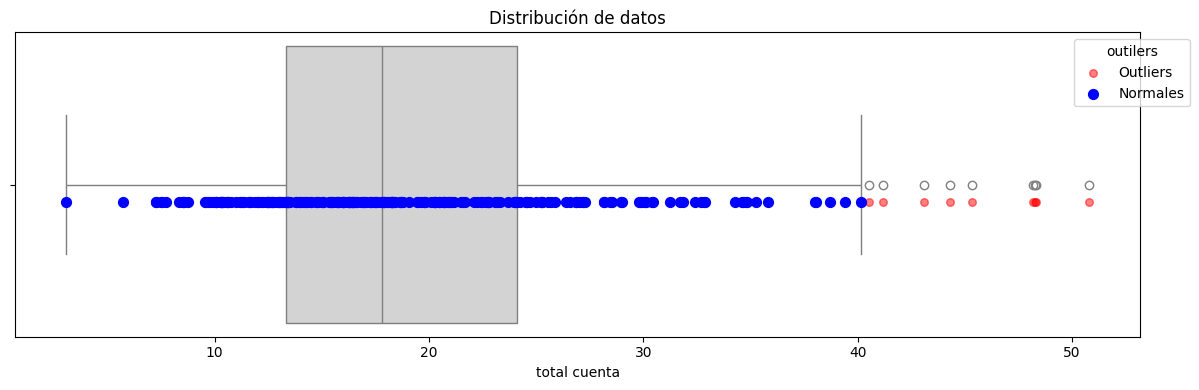

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]





plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")
plt.scatter(data_a, [0.05]*len(data_a), color="red", s=30, alpha=0.5, label='Outliers')
plt.scatter(data_b, [0.05]*len(data_b), color="blue", s=50, zorder=5, label= 'Normales')
plt.title('Distribución de datos')
plt.xlabel('total cuenta')
plt.legend(title = 'outilers', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()
plt.show()


# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

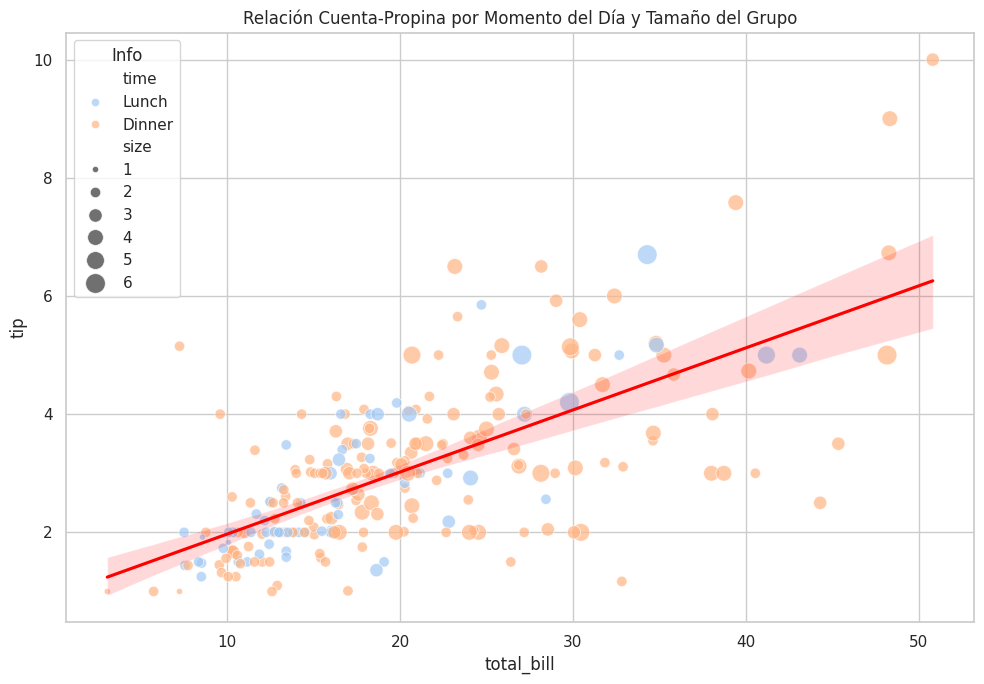

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")

plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid", palette="pastel")

sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",      # Colorea según 'Lunch' o 'Dinner'
    size="size",     # El tamaño del punto representa el tamaño del grupo
    sizes=(20, 200),
    alpha=0.7        # Un poco de transparencia para ver puntos superpuestos
)

plt.xlabel("Total de la Cuenta ($)")
plt.ylabel("Propina ($)")
plt.title("Relación Cuenta-Propina por Momento del Día y Tamaño del Grupo")
plt.legend(title="Info")
sns.regplot(x='total_bill', y='tip', data=tips, scatter=False,color='red',label='Tendencia')
plt.tight_layout()
plt.show()

In [ ]:
tips = sns.load_dataset("tips")

# --- Función para encontrar atípicos usando IQR ---
def encontrar_atipicos_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Devuelve una serie booleana: True si es atípico, False si no lo es
    return (data_column < limite_inferior) | (data_column > limite_superior)

tips['es_atipico_propina'] = encontrar_atipicos_iqr(tips['tip'])
tips['es_atipico_cuenta'] = encontrar_atipicos_iqr(tips['total_bill'])

# Combinamos las condiciones: un atípico es aquel que lo es en propina O en cuenta
tips['es_atipico'] = tips['es_atipico_propina'] | tips['es_atipico_cuenta']


print("Filas con datos atípicos identificados:")
print(tips[tips['es_atipico']])

Filas con datos atípicos identificados:
     total_bill    tip     sex smoker   day    time  size  es_atipico_propina  \
23        39.42   7.58    Male     No   Sat  Dinner     4                True   
47        32.40   6.00    Male     No   Sun  Dinner     4                True   
59        48.27   6.73    Male     No   Sat  Dinner     4                True   
102       44.30   2.50  Female    Yes   Sat  Dinner     3               False   
141       34.30   6.70    Male     No  Thur   Lunch     6                True   
142       41.19   5.00    Male     No  Thur   Lunch     5               False   
156       48.17   5.00    Male     No   Sun  Dinner     6               False   
170       50.81  10.00    Male    Yes   Sat  Dinner     3                True   
182       45.35   3.50    Male    Yes   Sun  Dinner     3               False   
183       23.17   6.50    Male    Yes   Sun  Dinner     4                True   
184       40.55   3.00    Male    Yes   Sun  Dinner     2            

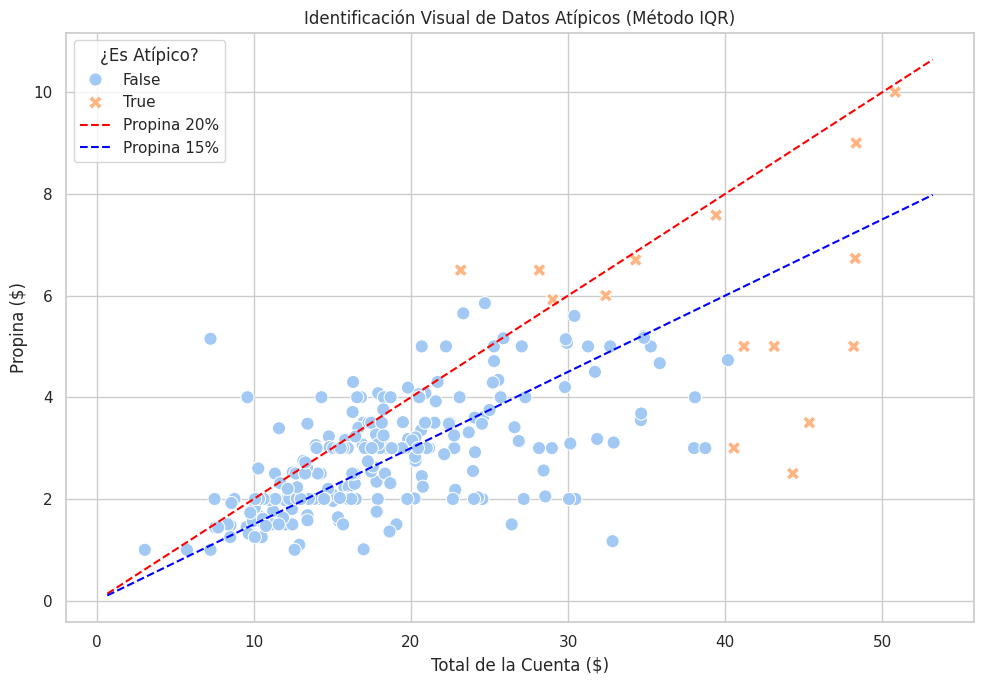

In [ ]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid", palette="pastel")


# Graficamos usando 'hue' para diferenciar los atípicos
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue='es_atipico',
    style='es_atipico',
    markers={True: 'X', False: 'o'},
    s=90 #
)

# Añadimos las líneas de porcentaje para dar más contexto
x_vals = np.array(plt.gca().get_xlim())
plt.plot(x_vals, 0.20 * x_vals, color='red', linestyle='--', label='Propina 20%')
plt.plot(x_vals, 0.15 * x_vals, color='blue', linestyle='--', label='Propina 15%')


plt.title("Identificación Visual de Datos Atípicos (Método IQR)")
plt.xlabel("Total de la Cuenta ($)")
plt.ylabel("Propina ($)")
plt.legend(title="¿Es Atípico?")
plt.tight_layout()
plt.show()

### Conclusión

Los datos atípicos se dividen en dos categorías claras. El primer grupo son clientes excepcionalmente generosos que dan propinas muy por encima del 20%. El segundo grupo son transacciones con un monto total inusualmente alto, que son atípicas por su magnitud.

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

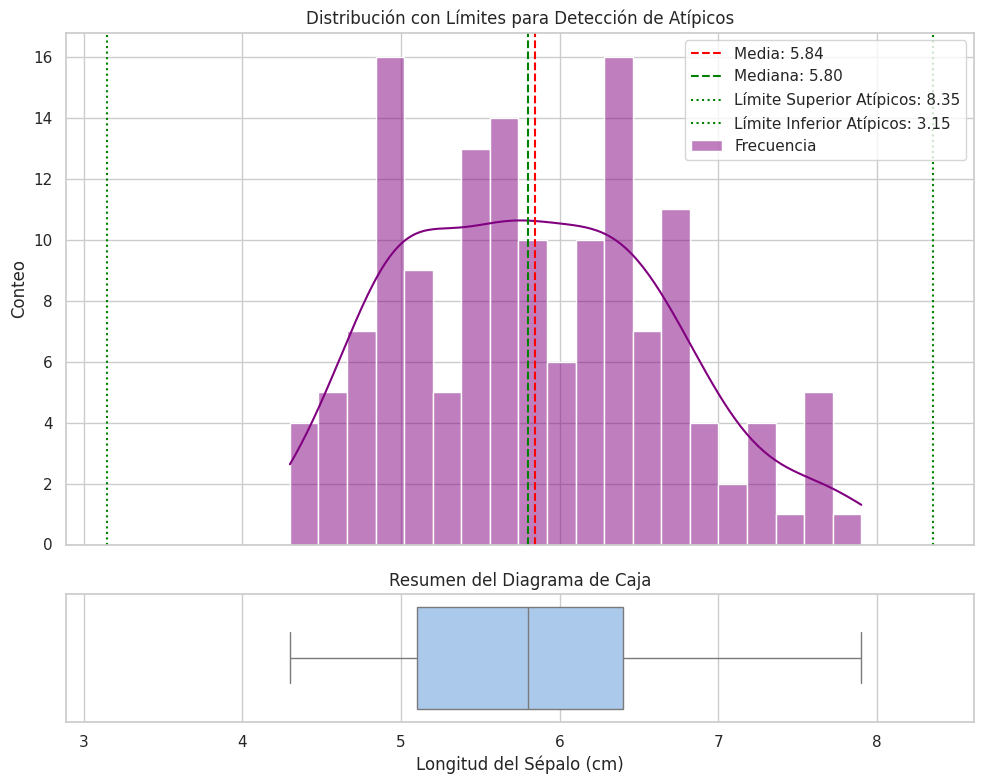

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
x = iris["sepal_length"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# --- 2. Creación de la figura con 2 subplots (histograma y boxplot) ---
fig, axes = plt.subplots(
    2, 1,
    figsize=(10, 8),
    sharex=True,
    gridspec_kw={"height_ratios": (.8, .2)} # Dar más espacio al histograma
)

sns.set_theme(style="whitegrid" , palette='pastel')

# --- Gráfico Superior: Histograma con Ayudas Visuales ---
sns.histplot(x=x, color='purple', bins=20, kde=True, ax=axes[0], label='Frecuencia')
axes[0].axvline(x.mean(), color='red', linestyle='--', label=f'Media: {x.mean():.2f}')
axes[0].axvline(x.median(), color='green', linestyle='--', label=f'Mediana: {x.median():.2f}')
axes[0].legend()

# --- Gráfico Inferior: Boxplot ---
# Añadimos las líneas de límite para atípicos
axes[0].axvline(limite_superior, color='green', linestyle=':', label=f'Límite Superior Atípicos: {limite_superior:.2f}')
axes[0].axvline(limite_inferior, color='green', linestyle=':', label=f'Límite Inferior Atípicos: {limite_inferior:.2f}')

axes[0].set_title('Distribución con Límites para Detección de Atípicos')
axes[0].legend()
axes[0].set_ylabel('Conteo')

sns.boxplot(x=x, ax=axes[1])
axes[1].set_title('Resumen del Diagrama de Caja')
axes[1].set_xlabel('Longitud del Sépalo (cm)')

plt.tight_layout()
plt.show()


##Conclusión
La gráfica demuestra de forma concluyente que no existen datos atípicos en la longitud del sépalo para este conjunto de datos.

Tanto el histograma, con todas sus barras contenidas dentro de los límites estadísticos

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

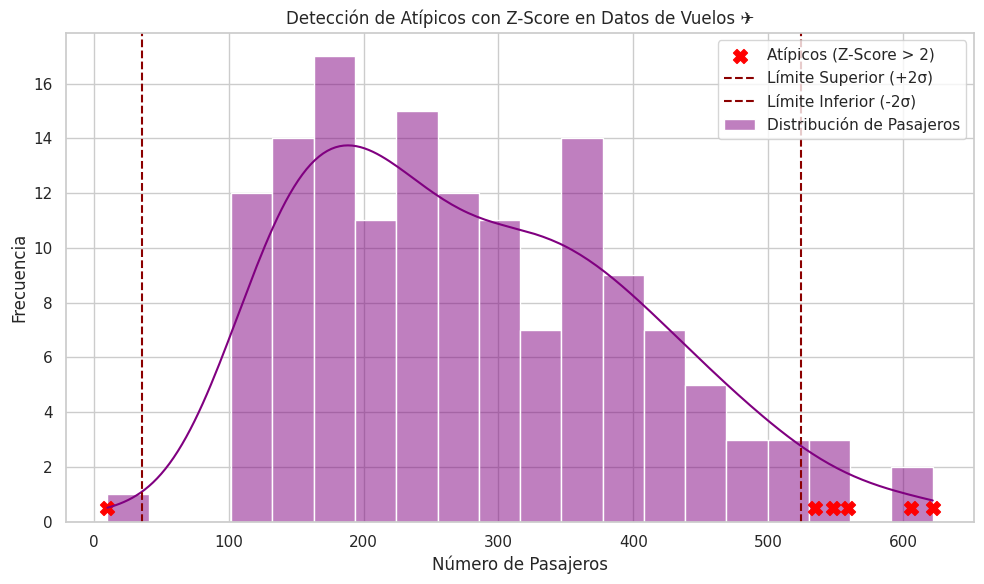

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Cargar y preparar los datos
flights = sns.load_dataset("flights")
x = flights["passengers"].values
# Se añaden puntos para forzar la aparición de atípicos
x = np.append(x, [10, 500])

z_scores = zscore(x)

es_atipico = np.abs(z_scores) > 2


plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")


sns.histplot(x=x, bins=20, kde=True, label='Distribución de Pasajeros', color='purple')

# Marcamos los atípicos con una 'X' roja visible
plt.scatter(x[es_atipico], np.full(np.sum(es_atipico), 0.5), color="red", s=100, marker="X", label='Atípicos (Z-Score > 2)')

mean = x.mean()
std = x.std()

plt.axvline(mean + 2 * std, color='darkred', linestyle='--', label='Límite Superior (+2σ)')
plt.axvline(mean - 2 * std, color='darkred', linestyle='--', label='Límite Inferior (-2σ)')

plt.title('Detección de Atípicos con Z-Score en Datos de Vuelos ✈️')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()



### Conclusión
Este gráfico identifica como atípicos los puntos con un Z-Score mayor a 2, es decir, aquellos que se alejan más de dos desviaciones estándar de la media. Las líneas rojas discontinuas marcan visualmente este umbral de "normalidad". Se detectan claramente atípicos (marcados con 'X') en ambos extremos

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

/tmp/ipython-input-3111129198.py:33: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


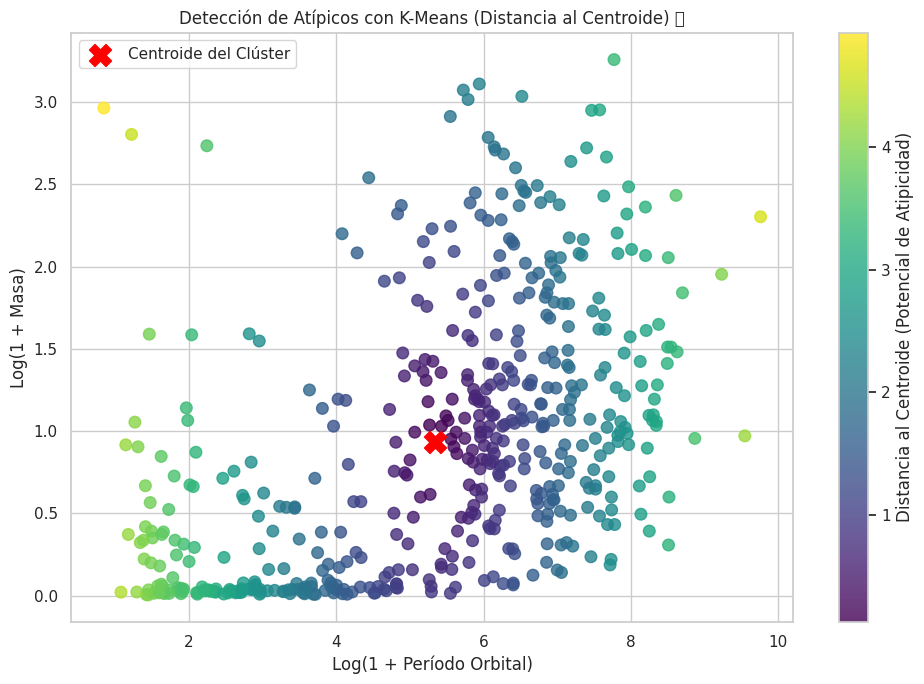

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X_log = np.log1p(X)

# K-Means para encontrar el centroide ---
kmeans = KMeans(n_clusters=1, random_state=42).fit(X_log)
# Obtenemos la distancia de cada punto a su centroide
distances = kmeans.transform(X_log).flatten()

plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

scatter = plt.scatter(X_log[:, 0], X_log[:, 1], c=distances, cmap="viridis", s=70, alpha=0.8)

centroid = kmeans.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=250, marker='X', label='Centroide del Clúster')


cbar = plt.colorbar(scatter)
cbar.set_label('Distancia al Centroide (Potencial de Atipicidad)')

plt.title('Detección de Atípicos con K-Means (Distancia al Centroide) 🪐')
plt.xlabel('Log(1 + Período Orbital)')
plt.ylabel('Log(1 + Masa)')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusión

El color de cada punto, desde el morado (cercano) hasta el amarillo (lejano), actúa como un indicador de "potencial de atipicidad". El gráfico revela un cúmulo denso de planetas "normales" y expone claramente a unos pocos puntos amarillos como atípicos. Estos representan exoplanetas con características extremas, como masas y períodos orbitales inusualmente grandes que los alejan significativamente de la norma.